# DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
# Dtaframe containing the data
df = pd.read_csv('/content/drive/MyDrive/NLP /project data/fprocessed_dataset.csv',encoding='utf16',header=None)
df.head()

,0,1
0,दिनेश कार्तिक अलावा युवा केदार जाधव बेहतर प्रत...,2
1,परफॉर्मेंस चार्ट शायद कभी,2
2,स दवा दिन तबीयत बहाल गई,1
3,चुनाव आयोग नाराज़ बंगाल इतने दिनों हिंसा रही च...,0
4,दौर इन्सान बरदाश्त हद हर बार जी उठता कितनी दफ़...,2


# PROCESSING

In [ ]:
#removing unit and 2-length words that stopwords file didnt catch

def removeSingleCharacter(df):
  for i in range(len(df)):
    old_string = str(df[0][i])
    new_string = ' '.join([w for w in old_string.split() if len(w)>2])
    df[0][i] = new_string
    return df
  	
new_df = removeSingleCharacter(df)

In [7]:
#defining the input and output
new_df = new_df.sample(frac=1) # randomly shuffling the Data
X_data = []
Y_data = []

for i in range(len(new_df)):
  X_data.append(str(new_df[0][i]))
  Y_data.append(new_df[1][i])

print(len(X_data),len(Y_data))

11103 11103


In [9]:
# Getting the max length of Tweet
def maxLengthTweet(df):
  max_len = 0
  for i in range(len(df)):
    string = str(df[0][i])
    length = len(string.split())
    if length > max_len:
      max_len = length 
  
  return max_len 

max_len_tweet = maxLengthTweet(new_df)
print(max_len_tweet)

31


In [10]:
# COnverting the strins into the list of each word data
def strtoListData(X_data):

  new_X_data = []
  for sent in X_data:
    listt = [w for w in sent.split()]
    new_X_data.append(listt)
  return new_X_data


new_X_data = strtoListData(X_data)
print(new_X_data[:5])

[['दिनेश', 'कार्तिक', 'अलावा', 'युवा', 'केदार', 'जाधव', 'बेहतर', 'प्रतिभा', 'दिखाई', 'टीम', 'रूप', 'सम्मिलित', 'प्रदर्शन', 'पाने', 'नाकामयाब'], ['परफॉर्मेंस', 'चार्ट', 'शायद', 'कभी'], ['स', 'दवा', 'दिन', 'तबीयत', 'बहाल', 'गई'], ['चुनाव', 'आयोग', 'नाराज़', 'बंगाल', 'इतने', 'दिनों', 'हिंसा', 'रही', 'चुनाव', 'आयोग', 'जागा', 'देखिए'], ['दौर', 'इन्सान', 'बरदाश्त', 'हद', 'हर', 'बार', 'जी', 'उठता', 'कितनी', 'दफ़ा', 'मरता']]


In [11]:
# removing all the words that are less than or equal to 2 length
new_X_data_ = []
for sent in new_X_data:
  listt = sent
  for j in sent:
    if len(j) <=2:
      listt.remove(j)

  new_X_data_.append(listt)
print(new_X_data_[:5])

[['दिनेश', 'कार्तिक', 'अलावा', 'युवा', 'केदार', 'जाधव', 'बेहतर', 'प्रतिभा', 'दिखाई', 'टीम', 'रूप', 'सम्मिलित', 'प्रदर्शन', 'पाने', 'नाकामयाब'], ['परफॉर्मेंस', 'चार्ट', 'शायद', 'कभी'], ['दवा', 'दिन', 'तबीयत', 'बहाल'], ['चुनाव', 'आयोग', 'नाराज़', 'बंगाल', 'इतने', 'दिनों', 'हिंसा', 'रही', 'चुनाव', 'आयोग', 'जागा', 'देखिए'], ['दौर', 'इन्सान', 'बरदाश्त', 'हर', 'बार', 'उठता', 'कितनी', 'दफ़ा', 'मरता']]


In [12]:
# Vocabolary Size 
word_counts = {}
print()
for sent in new_X_data_:
  for words in sent:
    word_counts[words] = word_counts.get(words, 0) + 1

vocab = [w for w in word_counts] 
vocab_size = len(vocab) + 1 # default 1 for '0' that we will pad after every sentence 
print(vocab_size)


15199


In [13]:
# Defining the dictionary
 
wordtoix = {} # word input -> output index
ixtoword = {} # index input -> output word

ix = 1
for w in vocab:
  wordtoix[w] = ix
  ixtoword[ix] = w

  ix+=1

print(len(wordtoix))

15198


In [14]:
# training data into sequence (word to number) 
seq_X_data = []
for sent in new_X_data:
  listt=[]
  for word in sent:
    listt.append(wordtoix[word])
  seq_X_data.append(listt)

print(seq_X_data[1500:1505])

[[47, 1912, 5177, 5323, 3432, 1131, 583, 577, 728, 583, 1293], [5324, 550, 5325, 421, 2319], [5326, 5327, 4516, 2352, 119, 5328, 1484, 5329, 5330, 5331, 1123, 567, 2475], [923, 4722, 2737, 1351], [5332, 155, 5333, 56, 5334, 320, 5335]]


In [15]:
# padding the Sequence (adding the zeros so that input length becomes equal)
from keras.preprocessing import sequence

pad_X_data = sequence.pad_sequences(seq_X_data , maxlen = max_len_tweet, padding='post')

print(pad_X_data[:5])

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [16 17 18 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [20 21 22 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [24 25 26 27 28 29 30 31 24 25 32 33  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [34 35 36 37 38 39 40 41 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]]


In [16]:
# converting output into one-hot vector
cat_Y_data = tf.keras.utils.to_categorical(Y_data,num_classes =3,dtype=int)
cat_Y_data[1]

array([0, 0, 1])

# DIVIDING THE DATASET

In [17]:
# Divding the data into test and train data
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(pad_X_data,cat_Y_data, test_size = 0.15, random_state = 6)

In [18]:
# Dividing the data into train and validation dataset
Xtrain , XVal , Ytrain , YVal = train_test_split(Xtrain,Ytrain, test_size = 0.15, random_state = 6)

In [23]:
print("Training Data: ", len(Xtrain))
print("Validation Data: ",len(XVal))
print("Test Data: ",len(Xtest))

Training Data:  8021
Validation Data:  1416
Test Data:  1666


# MODEL

**Simple RNN model**

In [25]:
# Model 1 
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

embed_dim = 50
model=Sequential()
model.add(Embedding(vocab_size, embed_dim, input_length=max_len_tweet))
model.add(SimpleRNN(256, return_sequences=True, dropout = 0.5))
model.add(SimpleRNN(100, dropout = 0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 50)            759950    
                                                                 
 simple_rnn (SimpleRNN)      (None, 31, 256)           78592     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               35700     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 874,545
Trainable params: 874,545
Non-trainable params: 0
_________________________________________________________________
None


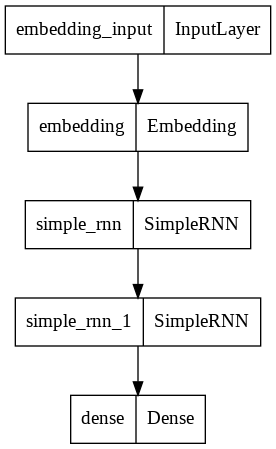

In [26]:
# Visualising the model
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
batch_sz = 32
epochs = 20

history = model.fit(Xtrain, Ytrain, validation_data=(XVal, YVal), batch_size=batch_sz, epochs=epochs)

Epoch 1/20
251/251 [==============================] - 13s 53ms/step - loss: 1.1023 - accuracy: 0.3402 - val_loss: 1.1163 - val_accuracy: 0.3121
Epoch 2/20
251/251 [==============================] - 13s 51ms/step - loss: 1.1026 - accuracy: 0.3452 - val_loss: 1.0985 - val_accuracy: 0.3376
Epoch 3/20
251/251 [==============================] - 13s 52ms/step - loss: 1.1062 - accuracy: 0.3364 - val_loss: 1.0952 - val_accuracy: 0.3665
Epoch 4/20
251/251 [==============================] - 13s 52ms/step - loss: 1.1039 - accuracy: 0.3295 - val_loss: 1.1058 - val_accuracy: 0.3658
Epoch 5/20
251/251 [==============================] - 13s 53ms/step - loss: 1.1041 - accuracy: 0.3345 - val_loss: 1.1129 - val_accuracy: 0.3100
Epoch 6/20
251/251 [==============================] - 13s 52ms/step - loss: 1.1034 - accuracy: 0.3396 - val_loss: 1.0954 - val_accuracy: 0.3665
Epoch 7/20
251/251 [==============================] - 13s 51ms/step - loss: 1.1011 - accuracy: 0.3346 - val_loss: 1.0987 - val_accuracy:

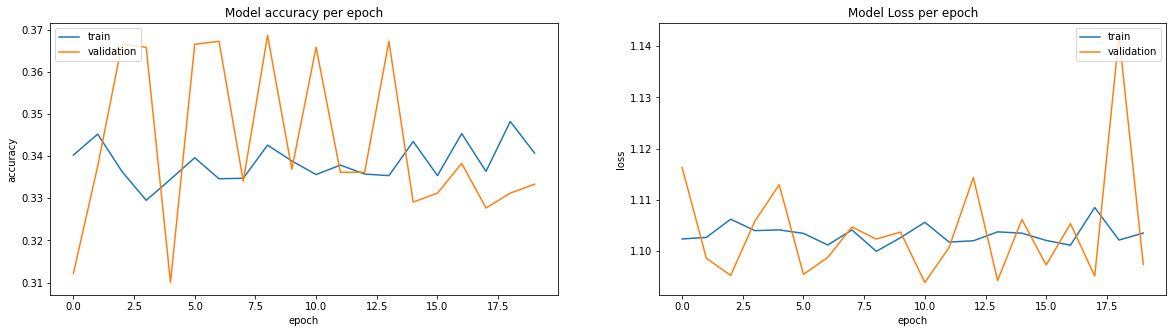

In [ ]:
# Validation and Train Accuracy and Loss Graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy per epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
test_scores = model.evaluate(Xtest, Ytest, verbose=0)

In [ ]:
print("Test Accuracy is :",test_scores[1])
print("Test Loss is :",test_scores[0])

Test Accuracy is : 0.34633854031562805
Test Loss is : 1.0965497493743896


**LSTM model without word embeddings**

In [28]:
#Model 2
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

def createModel(embed_dim):

  model=Sequential()
  model.add(Embedding(vocab_size, embed_dim, input_length=max_len_tweet))
  model.add(LSTM(256, return_sequences=True, dropout = 0.5))
  model.add(LSTM(100, dropout = 0.5))
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

  return model

In [29]:
model_lstm = createModel(50)
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 31, 50)            759950    
                                                                 
 lstm (LSTM)                 (None, 31, 256)           314368    
                                                                 
 lstm_1 (LSTM)               (None, 100)               142800    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,217,421
Trainable params: 1,217,421
Non-trainable params: 0
_________________________________________________________________


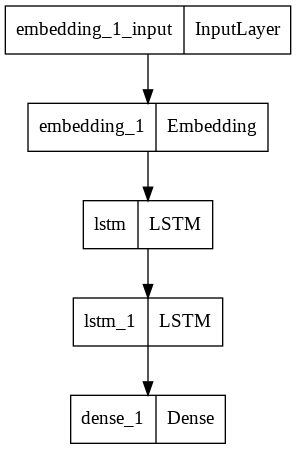

In [30]:
#visualising the model
plot_model(model_lstm)

In [ ]:
batch_sz = 32
epochs = 20

history_lstm = model_lstm.fit(Xtrain, Ytrain, validation_data=(XVal, YVal), batch_size=batch_sz, epochs=epochs)

Epoch 1/20
251/251 [==============================] - 42s 166ms/step - loss: 0.8877 - accuracy: 0.5259 - val_loss: 0.8147 - val_accuracy: 0.5805
Epoch 2/20
251/251 [==============================] - 41s 162ms/step - loss: 0.6642 - accuracy: 0.6927 - val_loss: 0.7665 - val_accuracy: 0.6751
Epoch 3/20
251/251 [==============================] - 41s 163ms/step - loss: 0.4437 - accuracy: 0.8319 - val_loss: 0.6677 - val_accuracy: 0.7366
Epoch 4/20
251/251 [==============================] - 41s 164ms/step - loss: 0.2672 - accuracy: 0.9099 - val_loss: 0.7013 - val_accuracy: 0.7528
Epoch 5/20
251/251 [==============================] - 41s 165ms/step - loss: 0.1832 - accuracy: 0.9451 - val_loss: 0.8033 - val_accuracy: 0.7408
Epoch 6/20
251/251 [==============================] - 41s 163ms/step - loss: 0.1408 - accuracy: 0.9605 - val_loss: 0.8100 - val_accuracy: 0.7521
Epoch 7/20
251/251 [==============================] - 41s 163ms/step - loss: 0.1194 - accuracy: 0.9655 - val_loss: 0.8274 - val_ac

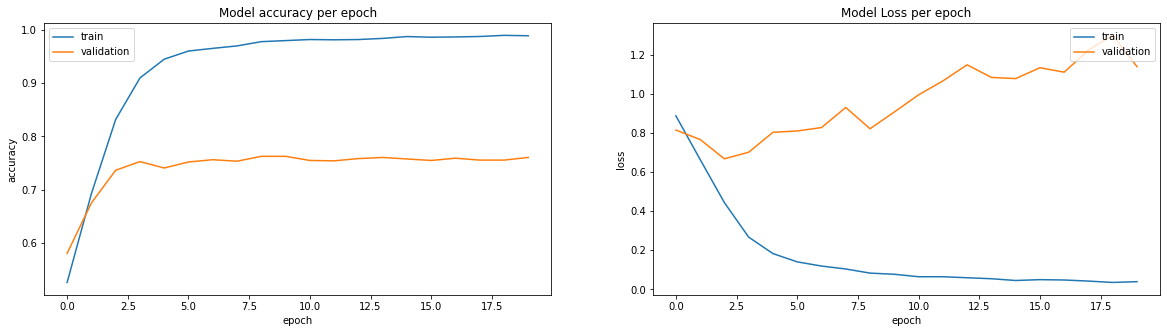

In [ ]:
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy per epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
test_scores = model_lstm.evaluate(Xtest, Ytest, verbose=0)

print("Test Accuracy is :",test_scores[1])
print("Test Loss is :",test_scores[0])

Test Accuracy is : 0.7761104702949524
Test Loss is : 1.0134615898132324


**LSTM with Word embedding**

In [ ]:
#Creating Embedding Matrix using Fasttext

!cp "/content/drive/MyDrive/NLP /project data/cc.hi.100.bin" "/content"

!pip install fasttext

import fasttext
import fasttext.util
ft = fasttext.load_model('/content/cc.hi.100.bin')
ft.get_dimension()

In [35]:
# Getting the word vector for a sample word
ft.get_word_vector('वतन')

array([-4.75478888e-01, -1.58951759e-01,  2.12404400e-01, -1.04172558e-01,
       -7.37969875e-02, -1.75860703e-01, -1.27464503e-01, -3.57916623e-01,
       -3.49265605e-01,  1.42368034e-01, -7.64457136e-02, -2.37016052e-01,
       -4.26092260e-02,  9.66585800e-02, -4.77866456e-02,  6.87337294e-02,
        2.13557869e-01, -1.83957756e-01,  1.64667621e-01, -9.55915526e-02,
       -6.36012480e-02,  2.33423114e-01,  1.80872276e-01, -4.56274301e-02,
        4.66011167e-01,  6.52549937e-02, -3.14200893e-02,  1.17021181e-01,
        8.65966827e-03, -5.44346571e-02,  2.23681837e-01,  7.33003691e-02,
       -8.54722783e-02, -1.60829917e-01, -1.04935065e-01, -1.12826020e-01,
       -2.34066233e-01,  2.43287534e-02, -3.56946886e-02,  2.96378601e-02,
        2.33614534e-01,  4.96965647e-02, -3.36869881e-02, -4.85402066e-03,
        1.20585851e-01, -1.75463960e-01,  5.77180497e-02,  3.13589349e-03,
       -1.70781463e-02,  7.98150450e-02, -1.51862204e-02, -1.54337525e-01,
        5.93622290e-02, -

In [36]:
# getting the embedding matrix
embed_dim = 100

embedding_matrix = np.zeros((vocab_size,embed_dim))
for word, i in wordtoix.items():
  embedding_vector = ft.get_word_vector(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [38]:
#model 
model_em = createModel(embed_dim)
model_em.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 31, 100)           1519900   
                                                                 
 lstm_4 (LSTM)               (None, 31, 256)           365568    
                                                                 
 lstm_5 (LSTM)               (None, 100)               142800    
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 2,028,571
Trainable params: 2,028,571
Non-trainable params: 0
_________________________________________________________________


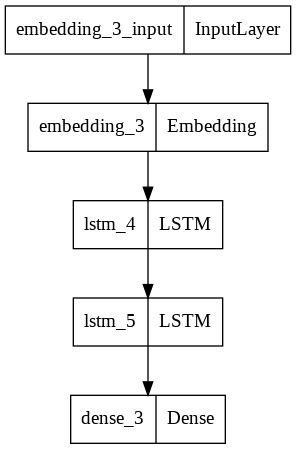

In [39]:
#visualising the model
plot_model(model_em)

In [37]:
# setting the weights as emebdding matrix and making it non-trainable
model_em.layers[0].set_weights =  embedding_matrix
model_em.layers[0].trainable = False

In [ ]:
batch_sz = 32
epochs = 20

history_em = model_em.fit(Xtrain, Ytrain, validation_data=(XVal, YVal), batch_size=batch_sz, epochs=epochs)

Epoch 1/20
251/251 [==============================] - 52s 190ms/step - loss: 0.9684 - accuracy: 0.4701 - val_loss: 0.8173 - val_accuracy: 0.5510
Epoch 2/20
251/251 [==============================] - 47s 186ms/step - loss: 0.7039 - accuracy: 0.6295 - val_loss: 0.8258 - val_accuracy: 0.6194
Epoch 3/20
251/251 [==============================] - 46s 185ms/step - loss: 0.4968 - accuracy: 0.8039 - val_loss: 0.6841 - val_accuracy: 0.7359
Epoch 4/20
251/251 [==============================] - 46s 184ms/step - loss: 0.2701 - accuracy: 0.9099 - val_loss: 0.7006 - val_accuracy: 0.7689
Epoch 5/20
251/251 [==============================] - 46s 184ms/step - loss: 0.1712 - accuracy: 0.9480 - val_loss: 0.6956 - val_accuracy: 0.7689
Epoch 6/20
251/251 [==============================] - 46s 183ms/step - loss: 0.1302 - accuracy: 0.9612 - val_loss: 0.8364 - val_accuracy: 0.7737
Epoch 7/20
251/251 [==============================] - 46s 183ms/step - loss: 0.0937 - accuracy: 0.9746 - val_loss: 0.9066 - val_ac

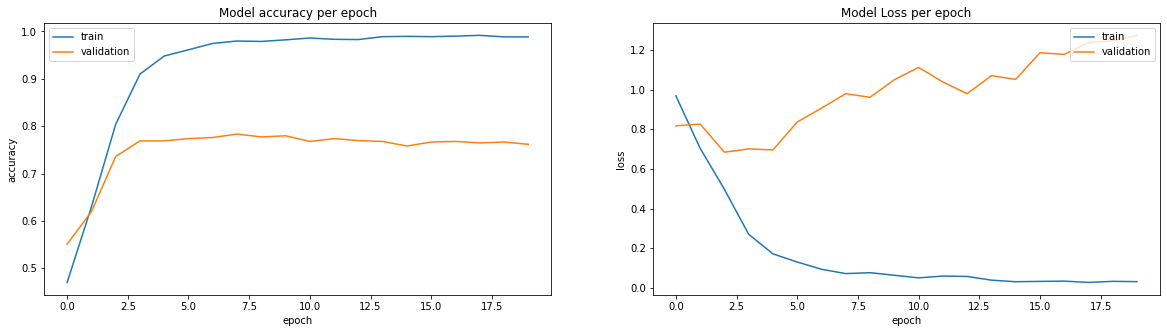

In [ ]:
plt.subplot(1,2,1)
plt.plot(history_em.history['accuracy'])
plt.plot(history_em.history['val_accuracy'])
plt.title('Model accuracy per epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_em.history['loss'])
plt.plot(history_em.history['val_loss'])
plt.title('Model Loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
test_scores = model_em.evaluate(Xtest, Ytest, verbose=0)

print("Test Accuracy is :",test_scores[1])
print("Test Loss is :",test_scores[0])

Test Accuracy is : 0.761704683303833
Test Loss is : 1.273447871208191
